In [1]:
import numpy as np
import pandas as pd
import csv

#作图分析
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
import matplotlib
matplotlib.colors
matplotlib.colors.rgb_to_hsv
matplotlib.colors.to_rgba
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.subplots_adjust
matplotlib.axes.Axes.text
matplotlib.axes.Axes.hlines
mpl.rcParams['font.sans-serif'] = ['SimHei']

def div(num):
    def real_div(input):
        return input / num
    return real_div

In [2]:
data = pd.read_csv('class_data.csv')
data.head()

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、您的年龄,2、请问您的家乡位于,3、请问您的家乡处在城市还是农村,4、您的民族,...,13、亖,14、您认为描述死亡的词汇在代际上是否存在变化,15、请问您是否了解过下列丧葬方式,16、如果让您做出选择，您对下列丧葬方式的意愿程度分别是（数值越大代表频率越高）—土葬,16、水葬,16、天葬,16、火葬,16、其他,17、您对死后拥有一个丧葬仪式的意愿强烈程度是,总分
0,1,2023/5/11 15:58:56,140秒,微信,NaN,183.172.243.103(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,2,是,土葬┋火葬┋水葬┋天葬,10,2,1,10,1,4,159
1,2,2023/5/11 16:00:51,243秒,微信,NaN,203.93.11.168(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,0,是,土葬┋火葬,6,2,0,4,0,6,66
2,3,2023/5/11 16:03:02,160秒,微信,NaN,223.104.41.235(北京-北京),18周岁-30周岁,黑龙江-鸡西,城市,汉族,...,2,是,土葬┋火葬┋水葬,2,8,0,4,0,3,87
3,4,2023/5/11 16:03:32,258秒,微信,NaN,219.142.99.23(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,1,是,土葬┋火葬┋水葬┋天葬,7,5,4,8,1,8,162
4,5,2023/5/11 16:05:33,414秒,微信,NaN,36.112.206.87(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,3,是,土葬┋火葬┋水葬┋天葬,1,9,2,4,0,4,98


In [3]:
data = data.drop(['序号','提交答卷时间','所用时间','来源','来源详情','来自IP','总分'], axis=1)
data.columns

Index(['1、您的年龄', '2、请问您的家乡位于', '3、请问您的家乡处在城市还是农村', '4、您的民族',
       '5、您是否听说过下列宗教用语中关于死亡的表述', '6、您和您周围的人对上述词语的使用频率（数值越大代表频率越高）—圆寂', '6、归仙',
       '6、羽化', '6、舍身', '6、归寂', '7、您在多大程度上觉得这些词汇不吉利/晦气/让人生理不适',
       '8、您是否听说过下列关于死亡的常规表述？', '9、请问您和您周围的人对上述词汇的使用频率（数值越大代表频率越高）—死', '9、去世',
       '9、没了', '9、走了', '9、作古', '9、长眠', '9、归西', '9、离开人世',
       '10、您在多大程度让认为这些词不吉利/晦气/让人心里不适—死', '10、去世', '10、没了', '10、走了', '10、作古',
       '10、长眠', '10、归西', '10、离开人世', '11、请问您是否听说过下列网络用语中关于死亡的表述',
       '12、请问您和您周围的人对上述词汇的使用频率—寄', '12、噶', '12、无', '12、4', '12、亖',
       '13、您在多大程度让认为这些词不吉利/晦气/让人心里不适—寄', '13、噶', '13、无', '13、4', '13、亖',
       '14、您认为描述死亡的词汇在代际上是否存在变化', '15、请问您是否了解过下列丧葬方式',
       '16、如果让您做出选择，您对下列丧葬方式的意愿程度分别是（数值越大代表频率越高）—土葬', '16、水葬', '16、天葬',
       '16、火葬', '16、其他', '17、您对死后拥有一个丧葬仪式的意愿强烈程度是'],
      dtype='object')

In [4]:
data.columns=['年龄段','家乡','城市','民族','宗教用语认知','宗教用语频率—圆寂','归仙','羽化','舍身','归寂','宗教用语晦气程度','常规表述认知','常规表述频率-死','常规表述频率-去世','常规表述频率-没了','常规表述频率-走了','常规表述频率-作古','常规表述频率-长眠','常规表述频率-归西','常规表述频率-离开人世','常规表述晦气程度—死','常规表述晦气程度-去世','常规表述晦气程度-没了','常规表述晦气程度-走了','常规表述晦气程度-作古','常规表述晦气程度-长眠','常规表述晦气程度-归西','常规表述晦气程度-离开人世','网络用语认知','网络用语频率—寄','网络用语频率-噶','网络用语频率-无','网络用语频率-4','网络用语频率-亖','网络用语晦气程度—寄','网络用语晦气程度—噶','网络用语晦气程度—无','网络用语晦气程度—4','网络用语晦气程度—亖','代际变化认知','丧葬方式认知','土葬','水葬,','天葬','火葬','其他','丧葬仪式意愿程度']

In [5]:
data.columns

Index(['年龄段', '家乡', '城市', '民族', '宗教用语认知', '宗教用语频率—圆寂', '归仙', '羽化', '舍身', '归寂',
       '宗教用语晦气程度', '常规表述认知', '常规表述频率-死', '常规表述频率-去世', '常规表述频率-没了', '常规表述频率-走了',
       '常规表述频率-作古', '常规表述频率-长眠', '常规表述频率-归西', '常规表述频率-离开人世', '常规表述晦气程度—死',
       '常规表述晦气程度-去世', '常规表述晦气程度-没了', '常规表述晦气程度-走了', '常规表述晦气程度-作古',
       '常规表述晦气程度-长眠', '常规表述晦气程度-归西', '常规表述晦气程度-离开人世', '网络用语认知', '网络用语频率—寄',
       '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖', '网络用语晦气程度—寄',
       '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖', '代际变化认知',
       '丧葬方式认知', '土葬', '水葬,', '天葬', '火葬', '其他', '丧葬仪式意愿程度'],
      dtype='object')

In [6]:
data.head()

,年龄段,家乡,城市,民族,宗教用语认知,宗教用语频率—圆寂,归仙,羽化,舍身,归寂,...,网络用语晦气程度—4,网络用语晦气程度—亖,代际变化认知,丧葬方式认知,土葬,"水葬,",天葬,火葬,其他,丧葬仪式意愿程度
0,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂┋归仙┋羽化┋舍身┋归寂,5,1,1,9,1,...,2,2,是,土葬┋火葬┋水葬┋天葬,10,2,1,10,1,4
1,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂,2,0,0,0,0,...,0,0,是,土葬┋火葬,6,2,0,4,0,6
2,18周岁-30周岁,黑龙江-鸡西,城市,汉族,圆寂┋归仙┋羽化┋舍身,1,1,1,0,0,...,0,2,是,土葬┋火葬┋水葬,2,8,0,4,0,3
3,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂┋归仙┋羽化┋归寂,2,4,2,0,2,...,1,1,是,土葬┋火葬┋水葬┋天葬,7,5,4,8,1,8
4,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂┋归仙┋羽化,0,0,0,0,0,...,3,3,是,土葬┋火葬┋水葬┋天葬,1,9,2,4,0,4


# 一、数据处理与影响因子展示

## 1、年龄段 

In [7]:

#年龄段处理：
#   18周岁以下：     1
#   18周岁-30周岁：  2
#   30周岁-55周岁：  3
#   55周岁以上：     4
data.loc[data['年龄段']=='18周岁以下',"年龄段"] = 1
data.loc[data['年龄段']=='18周岁-30周岁','年龄段'] = 2
data.loc[data['年龄段']=='30周岁-55周岁','年龄段'] = 3
data.loc[data['年龄段']=='55周岁以上','年龄段'] = 4
#统计各年龄段
data['年龄段'].value_counts()

#data.head()

2    125
3     76
4     19
1     11
Name: 年龄段, dtype: int64

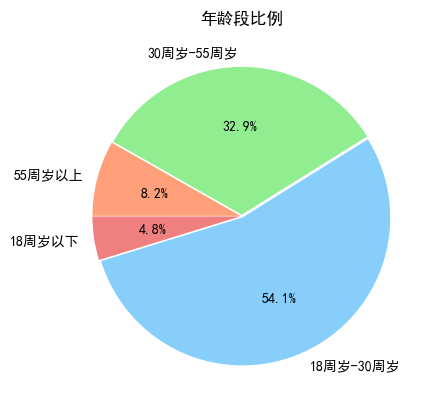

In [8]:
#年龄段饼图
labels = ['18周岁以下','18周岁-30周岁','30周岁-55周岁','55周岁以上']
count=231
share =[11/count,125/count,76/count,19/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightsalmon'])

# 标题
plt.title('年龄段比例')
plt.savefig("./年龄段比例.png",dpi=500,bbox_inches = 'tight')
plt.show()



## 2、城市与农村

In [9]:
#城市与农村处理：
#    城市：1
#    农村：0
data.loc[data['城市']=='城市','城市'] = 1
data.loc[data['城市']=='农村','城市'] = 0
#统计城市与农村
data['城市'].value_counts()
#data.head()

1    192
0     39
Name: 城市, dtype: int64

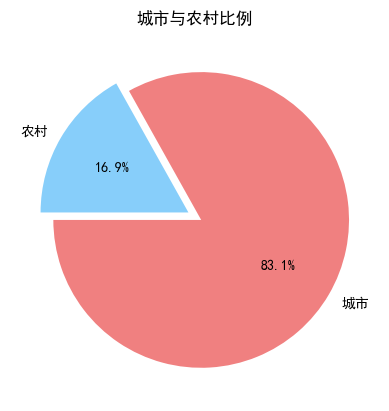

In [10]:
#城市与农村饼图
labels = ['城市','农村']
count=231
share =[192/count,39/count]
# 设置分裂属性
explode = [0.05, 0.05] 
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['lightcoral', 'lightskyblue'])
# 标题
plt.title('城市与农村比例')
plt.savefig("./城市与农村比例.png",dpi=500,bbox_inches = 'tight')
plt.show()

## 3、民族 

In [11]:
#民族处理：
#    汉族：1
#    其他：2
data.loc[data['民族']!='汉族','民族'] = 2
data.loc[data['民族']=='汉族','民族'] = 1
#统计民族情况
data['民族'].value_counts()
#data.head()

1    187
2     44
Name: 民族, dtype: int64

其他少数民族细则:   
    回  族      30   
    满  族      5   
    土家族      3   
    蒙古族      2   
    布依族      2   
    苗  族      1   
    侗  族      1

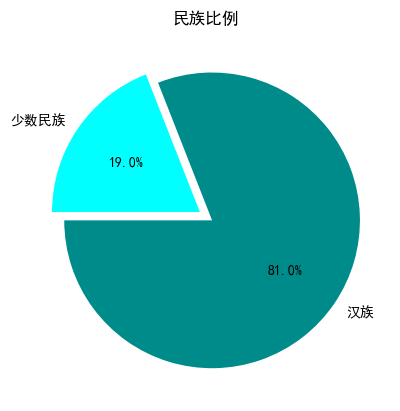

In [12]:
#民族饼图
labels = ['汉族','少数民族']
count=231
share =[187/count,44/count]
# 设置分裂属性
explode = [0.05, 0.05] 
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['darkcyan', 'cyan'])
# 标题
plt.title('民族比例')
plt.savefig("./民族比例.png",dpi=500,bbox_inches = 'tight')
plt.show()

## 为方便下述进行多项统计，对表进行拆分

In [13]:

#年龄段处理：
#   18周岁以下：     data1
#   18周岁-30周岁：  data2
#   30周岁-55周岁：  data3
#   55周岁以上：     data4
DataFrame1 = data.copy()
data1=DataFrame1[DataFrame1.年龄段.isin([1])]
data2=DataFrame1[DataFrame1.年龄段.isin([2])]
data3=DataFrame1[DataFrame1.年龄段.isin([3])]
data4=DataFrame1[DataFrame1.年龄段.isin([4])]

#城市/农村处理：
#   城市：  data5
#   农村：  data6
data5=DataFrame1[DataFrame1.城市.isin([1])]
data6=DataFrame1[DataFrame1.城市.isin([0])]

#民族处理：
#    汉族：  data7
#    其他：  data8
data7=DataFrame1[DataFrame1.民族.isin([1])]
data8=DataFrame1[DataFrame1.民族.isin([2])]

# 二、对多种死亡用语的调查

## 1、宗教用语调查

In [14]:
#拆分多选题

#拆分宗教用语的认知情况
y = [list(x.split('┋')) for x in data['宗教用语认知']]
yuanji = 0
guixian = 0
yuhua = 0
sheshen = 0
guiji = 0
nop = 0
for item in y:
    for select in item:
        if select=='圆寂':
            yuanji = yuanji+1
        elif select=='归仙':
            guixian = guixian + 1
        elif select=='羽化':
            yuhua = yuhua + 1
        elif select == '舍身':
            sheshen = sheshen +1
        elif select == '归寂':
            guiji = guiji +1
        else:
            nop = nop + 1
print('圆寂：',yuanji)
print('归仙：',guixian) 
print('羽化：',yuhua) 
print('舍身：',sheshen) 
print('归寂：',guiji)
print('都没听说过：',nop)


圆寂： 198
归仙： 133
羽化： 143
舍身： 60
归寂： 96
都没听说过： 29


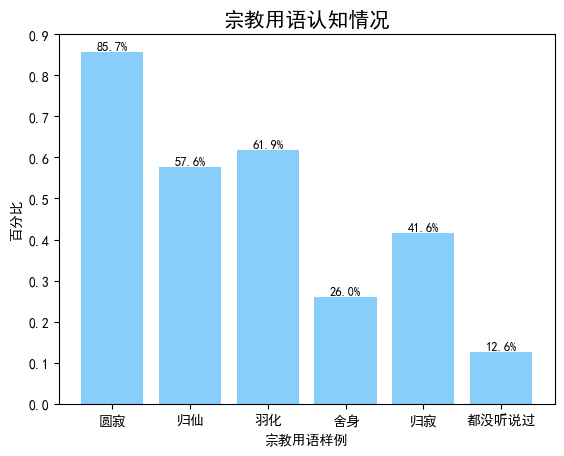

In [15]:
#绘制宗教用语柱形图
x=np.arange(6)
labels = ('圆寂','归仙', '羽化', '舍身','归寂','都没听说过')
share = [198/231, 133/231, 143/231,60/231,96/231,29/231]
plt.bar(x,share,color='lightskyblue', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('宗教用语样例')
plt.title('宗教用语认知情况',fontsize=15)
plt.savefig("./宗教用语认知情况.png",dpi=500,bbox_inches = 'tight')
plt.show()


### 1.1  宗教用语使用频率

In [16]:
def get_num(data,idx1,idx2):
    ret = {}
    for i,name in enumerate(idx1):
        tmp = 0
        for item in data[name]:
            try:
                tmp += int(item)
            except Exception:
                pass
        ret[idx2[i]] = tmp
    return ret

ans = get_num(data,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans.keys(),ans.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([522, 319, 300, 272, 243])


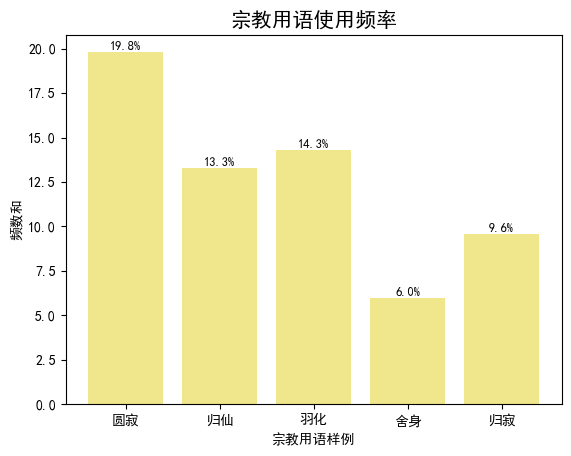

In [17]:
#宗教用语使用频率柱形图
x=np.arange(5)
labels = tuple(ans.keys())
share = list(map(div(10),[yuanji, guixian, yuhua, sheshen, guiji]))
plt.bar(x,share,color='khaki', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('频数和')
plt.xlabel('宗教用语样例')
plt.title('宗教用语使用频率',fontsize=15)
plt.savefig("./宗教用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.1.1  宗教用语分年龄段使用频率

In [18]:
#宗教用语分年龄段使用频率
#18周岁以下
ans_age1_f = get_num(data1,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_age1_f.keys(),ans_age1_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([11, 17, 6, 11, 6])


In [19]:
#18周岁-30周岁
ans_age2_f = get_num(data2,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_age2_f.keys(),ans_age2_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([242, 108, 131, 72, 65])


In [20]:
#30周岁-55周岁
ans_age3_f = get_num(data3,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_age3_f.keys(),ans_age3_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([188, 141, 120, 149, 120])


In [21]:
#55周岁以上
ans_age4_f = get_num(data4,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_age4_f.keys(),ans_age4_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([81, 53, 43, 40, 52])


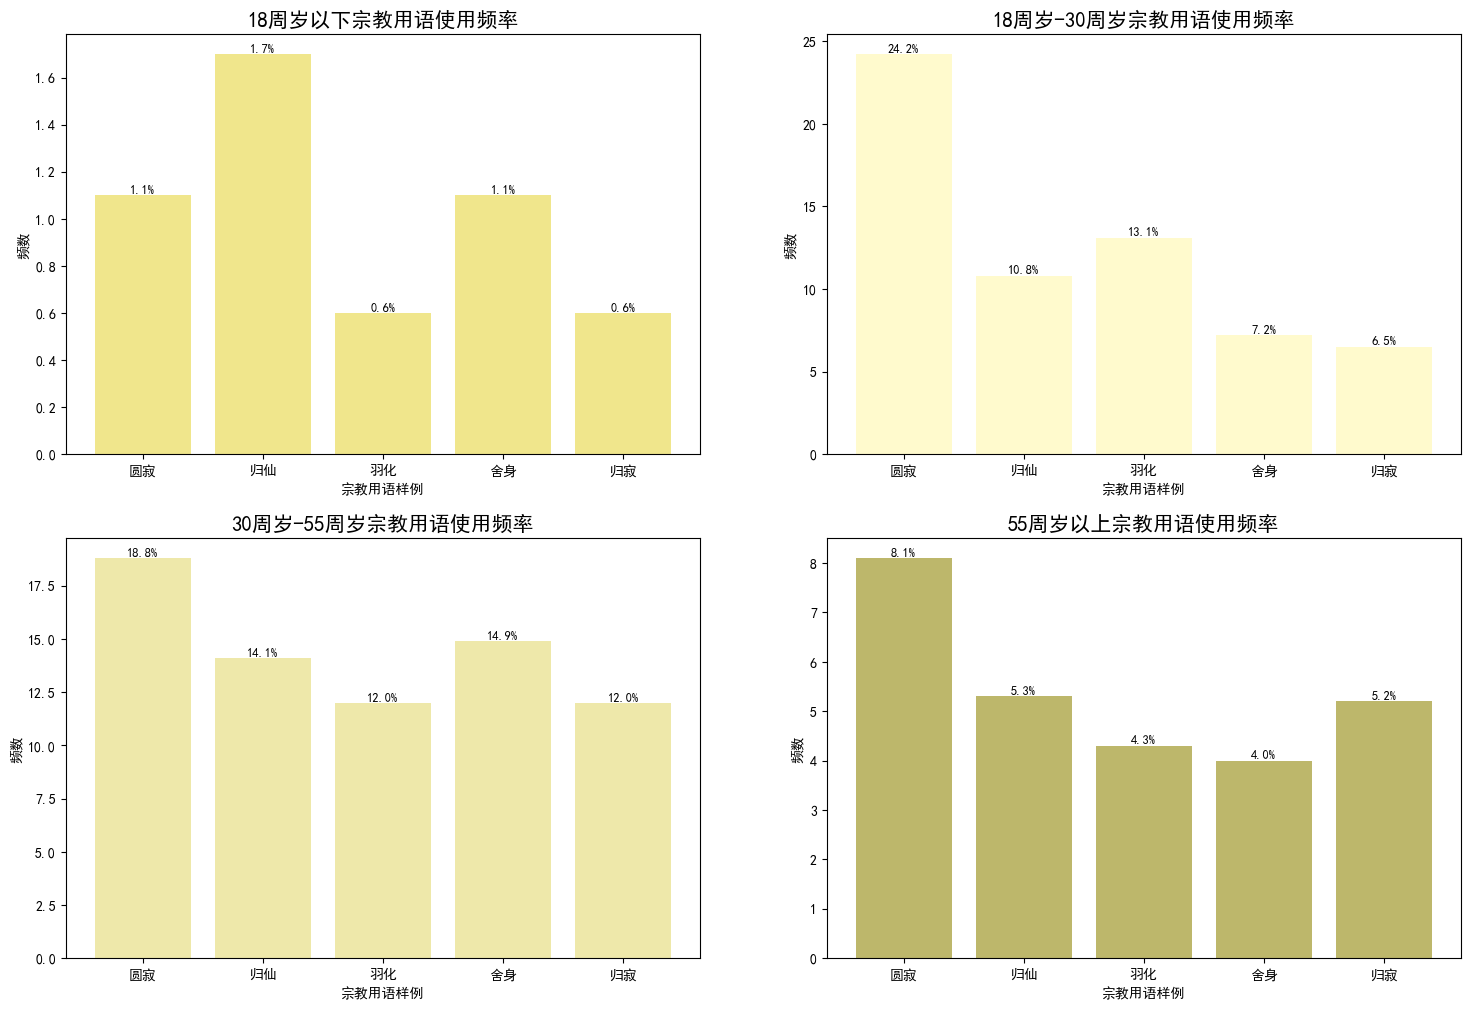

In [22]:
#宗教用语使用频率各年龄段柱形图
figure,axes = plt.subplots(2,2,figsize=(18,12),dpi=100)
ax = axes.flatten()

#18周岁以下
x1=np.arange(5)
labels = tuple(ans_age1_f.keys())
share1 = list(map(div(10),[11, 17, 6, 11, 6]))
axes[0][0].bar(x1,share1,color='khaki', tick_label=labels) 
for a,b in zip(x1,share1):
    axes[0][0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0][0].set_ylabel('频数')
axes[0][0].set_xlabel('宗教用语样例')
axes[0][0].set_title('18周岁以下宗教用语使用频率',fontsize=15)

#18周岁-30周岁
x2=np.arange(5)
labels = tuple(ans_age2_f.keys())
share2 = list(map(div(10),[242, 108, 131, 72, 65]))
axes[0][1].bar(x2,share2,color='lemonchiffon', tick_label=labels) 
for a,b in zip(x2,share2):
    axes[0][1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0][1].set_ylabel('频数')
axes[0][1].set_xlabel('宗教用语样例')
axes[0][1].set_title('18周岁-30周岁宗教用语使用频率',fontsize=15)

#30周岁-55周岁
x3=np.arange(5)
labels = tuple(ans_age3_f.keys())
share3 = list(map(div(10),[188, 141, 120, 149, 120]))
axes[1][0].bar(x3,share3,color='palegoldenrod', tick_label=labels) 
for a,b in zip(x3,share3):
    axes[1][0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1][0].set_ylabel('频数')
axes[1][0].set_xlabel('宗教用语样例')
axes[1][0].set_title('30周岁-55周岁宗教用语使用频率',fontsize=15)

#55周岁以上
x4=np.arange(5)
labels = tuple(ans_age4_f.keys())
share4 = list(map(div(10),[81, 53, 43, 40, 52]))
axes[1][1].bar(x4,share4,color='darkkhaki', tick_label=labels) 
for a,b in zip(x4,share4):
    axes[1][1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1][1].set_ylabel('频数')
axes[1][1].set_xlabel('宗教用语样例')
axes[1][1].set_title('55周岁以上宗教用语使用频率',fontsize=15)

plt.savefig("./各年龄段宗教用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

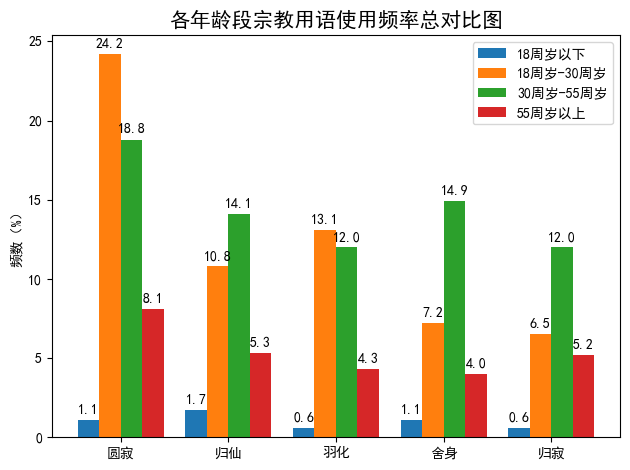

In [23]:
#各年龄段宗教用语总对比图

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

x=np.arange(5)
labels = tuple(ans.keys())

width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, share1, width, label='18周岁以下')
rects2 = ax.bar(x - width*0.5, share2, width, label='18周岁-30周岁')
rects3 = ax.bar(x + width*0.5, share3, width, label='30周岁-55周岁')
rects4 = ax.bar(x + width*1.5, share4, width, label='55周岁以上')

ax.set_ylabel('频数（%）')
ax.set_title('各年龄段宗教用语使用频率总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
    
plt.savefig("./各年龄段宗教用语使用频率总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.1.2 宗教用语分城市/农村使用频率

In [24]:
#宗教用语分城市/农村使用频率
#城市
ans_city_f = get_num(data5,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_city_f.keys(),ans_city_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([431, 251, 238, 245, 193])


In [25]:
#农村
ans_country_f = get_num(data6,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_country_f.keys(),ans_country_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([91, 68, 62, 27, 50])


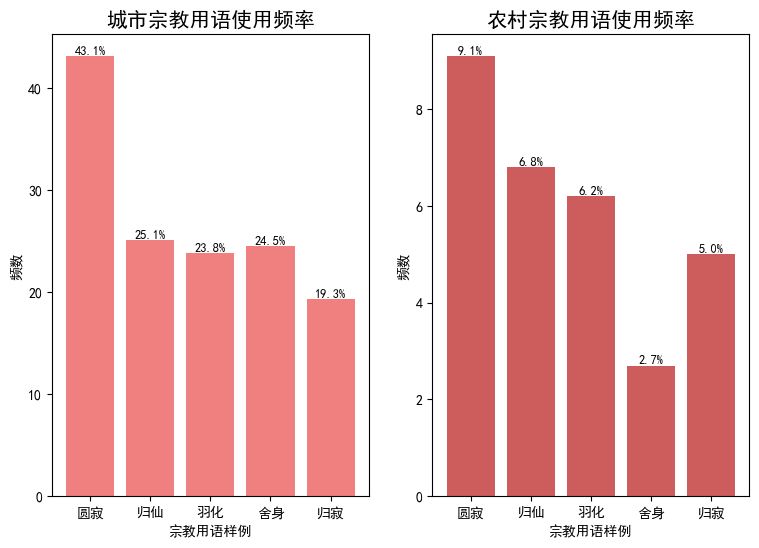

In [26]:
#城市与农村宗教用语使用频率柱形图
figure,axes = plt.subplots(1,2,figsize=(9,6),dpi=100)
ax = axes.flatten()

#城市
x1=np.arange(5)
labels = tuple(ans_city_f.keys())
share5 = list(map(div(10),[431, 251, 238, 245, 193]))
axes[0].bar(x1,share5,color='lightcoral', tick_label=labels) 
for a,b in zip(x1,share5):
    axes[0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0].set_ylabel('频数')
axes[0].set_xlabel('宗教用语样例')
axes[0].set_title('城市宗教用语使用频率',fontsize=15)

#农村
x2=np.arange(5)
labels = tuple(ans_country_f.keys())
share6 = list(map(div(10),[91, 68, 62, 27, 50]))
axes[1].bar(x2,share6,color='indianred', tick_label=labels) 
for a,b in zip(x2,share6):
    axes[1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1].set_ylabel('频数')
axes[1].set_xlabel('宗教用语样例')
axes[1].set_title('农村宗教用语使用频率',fontsize=15)

plt.savefig("./城市与农村宗教用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

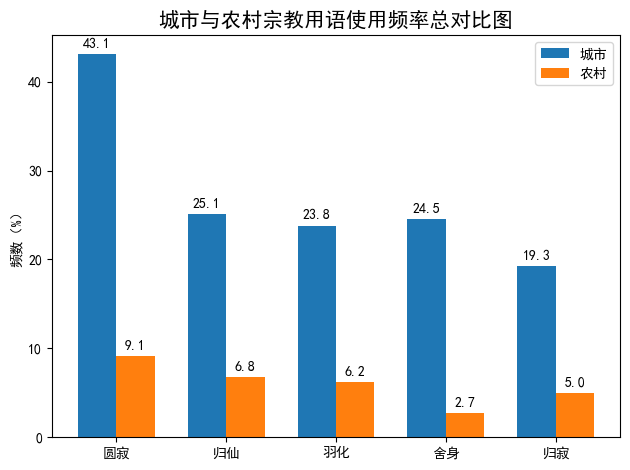

In [27]:
#城市与农村宗教用语使用频率对比图
x=np.arange(5)
labels = tuple(ans.keys())

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects5 = ax.bar(x - width*0.5, share5, width, label='城市')
rects6 = ax.bar(x + width*0.5, share6, width, label='农村')

ax.set_ylabel('频数（%）')
ax.set_title('城市与农村宗教用语使用频率总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects5)
autolabel(rects6)
fig.tight_layout()
    
plt.savefig("./城市与农村宗教用语使用频率总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.1.3  宗教用语分民族使用频率

In [28]:
#宗教用语分民族使用频率
#汉族
ans_han_f = get_num(data7,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_han_f.keys(),ans_han_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([451, 237, 233, 223, 175])


In [29]:
#宗教用语分民族使用频率
#其他民族
ans_qt_f = get_num(data8,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans_qt_f.keys(),ans_qt_f.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([71, 82, 67, 49, 68])


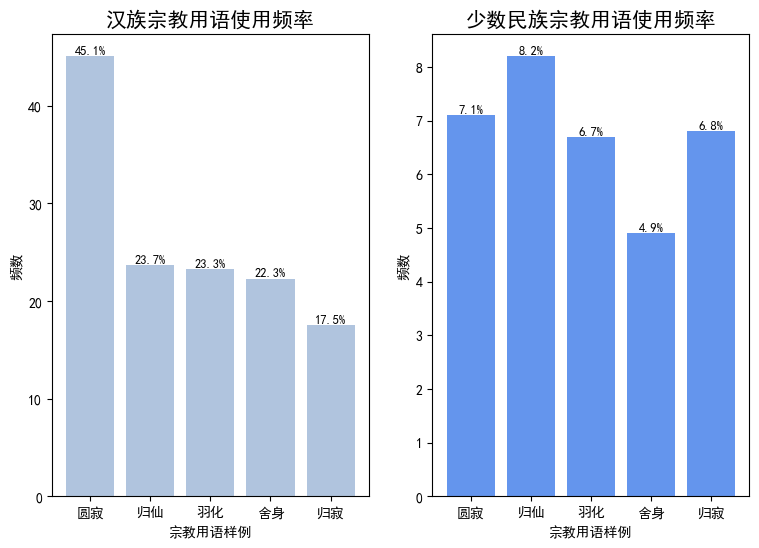

In [30]:
#民族宗教用语使用频率柱形图
figure,axes = plt.subplots(1,2,figsize=(9,6),dpi=100)
ax = axes.flatten()

#汉族
x1=np.arange(5)
labels = tuple(ans_han_f.keys())
share7 = list(map(div(10),[451, 237, 233, 223, 175]))
axes[0].bar(x1,share7,color='lightsteelblue', tick_label=labels) 
for a,b in zip(x1,share7):
    axes[0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0].set_ylabel('频数')
axes[0].set_xlabel('宗教用语样例')
axes[0].set_title('汉族宗教用语使用频率',fontsize=15)

#其他民族
x2=np.arange(5)
labels = tuple(ans_qt_f.keys())
share8 = list(map(div(10),[71, 82, 67, 49, 68]))
axes[1].bar(x2,share8,color='cornflowerblue', tick_label=labels) 
for a,b in zip(x2,share8):
    axes[1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1].set_ylabel('频数')
axes[1].set_xlabel('宗教用语样例')
axes[1].set_title('少数民族宗教用语使用频率',fontsize=15)

plt.savefig("./各民族宗教用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

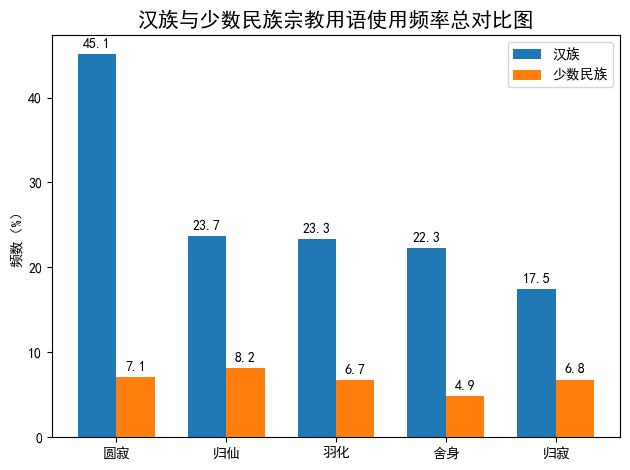

In [31]:
#汉族与少数民族宗教用语使用频率对比图
x=np.arange(5)
labels = tuple(ans.keys())

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects7 = ax.bar(x - width*0.5, share7, width, label='汉族')
rects8 = ax.bar(x + width*0.5, share8, width, label='少数民族')

ax.set_ylabel('频数（%）')
ax.set_title('汉族与少数民族宗教用语使用频率总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects7)
autolabel(rects8)
fig.tight_layout()
    
plt.savefig("./汉族与少数民族宗教用语使用频率总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 1.2  宗教用语晦气程度

In [32]:
#宗教用语晦气程度
data['宗教用语晦气程度'].value_counts()

0       98
2       31
1       27
(跳过)    27
4       15
5       11
3        7
6        5
8        4
9        3
7        2
10       1
Name: 宗教用语晦气程度, dtype: int64

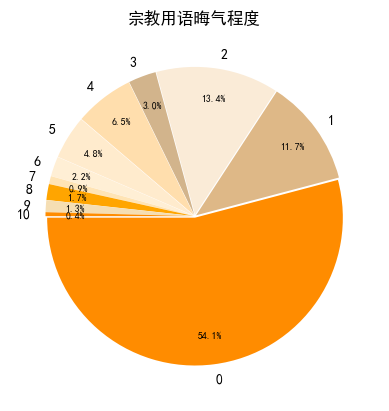

In [33]:
#宗教用语晦气程度饼图
labels = ['0','1','2','3','4','5','6','7','8','9','10']
count=231
share =[125/count,27/count,31/count,7/count,15/count,11/count,5/count,2/count,4/count,3/count,1/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
patches,l_text,p_text = plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',pctdistance = 0.8,
        startangle = 180, shadow = False,
        colors = ['darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])
for t in p_text:
    t.set_size(7)
# 标题
plt.title('宗教用语晦气程度')
plt.savefig("./宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.2.1 宗教用语分年龄段晦气程度

In [34]:
#宗教用语分年龄段晦气程度
#18周岁以下
data1['宗教用语晦气程度'].value_counts()

1       3
(跳过)    3
0       2
2       2
5       1
Name: 宗教用语晦气程度, dtype: int64

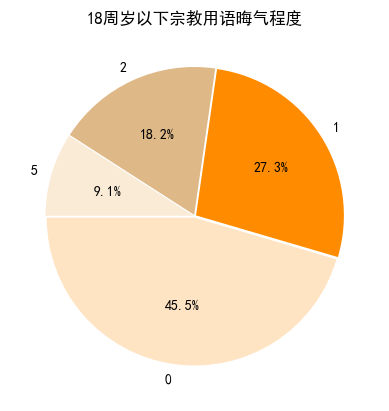

In [35]:
#18周岁以下
labels = ['0','1','2','5']
count=11
share1 =[5/count,3/count,2/count,1/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
plt.pie(share1, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['bisque', 'darkorange', 'burlywood', 'antiquewhite'])

# 标题
plt.title('18周岁以下宗教用语晦气程度')
plt.savefig("./18周岁以下宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [36]:
#18周岁-30周岁
data2['宗教用语晦气程度'].value_counts()

0       67
2       13
1       13
(跳过)    10
4        9
3        5
6        4
5        2
9        1
7        1
Name: 宗教用语晦气程度, dtype: int64

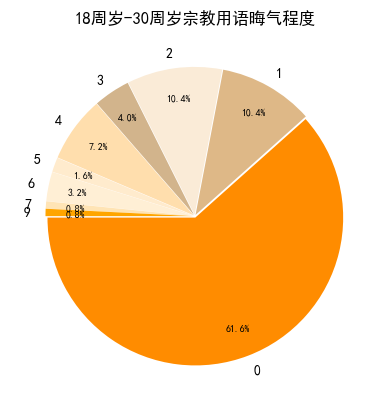

In [37]:
#18周岁-30周岁
labels = ['0','1','2','3','4','5','6','7','9']
count=125
share2 =[77/count,13/count,13/count,5/count,9/count,2/count,4/count,1/count,1/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
patches,l_text,p_text = plt.pie(share2, explode = explode,
        labels = labels, autopct = '%3.1f%%',pctdistance = 0.8,
        startangle = 180, shadow = False,
        colors = ['darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])
for t in p_text:
    t.set_size(7)
# 标题
plt.title('18周岁-30周岁宗教用语晦气程度')
plt.savefig("./18周岁-30周岁宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [38]:
#30周岁-55周岁
data3['宗教用语晦气程度'].value_counts()

0       25
2       14
(跳过)    12
1        8
5        6
8        4
9        2
4        2
3        1
7        1
6        1
Name: 宗教用语晦气程度, dtype: int64

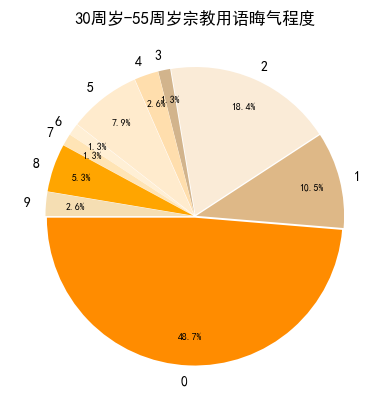

In [39]:
#30周岁-55周岁
labels = ['0','1','2','3','4','5','6','7','8','9']
count=76
share3 =[37/count,8/count,14/count,1/count,2/count,6/count,1/count,1/count,4/count,2/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
patches,l_text,p_text = plt.pie(share3, explode = explode,
        labels = labels, autopct = '%3.1f%%',pctdistance = 0.8,
        startangle = 180, shadow = False,
        colors = ['darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])
for t in p_text:
    t.set_size(7)

# 标题
plt.title('30周岁-55周岁宗教用语晦气程度')
plt.savefig("./30周岁-55周岁宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [40]:
#55周岁以上
data4['宗教用语晦气程度'].value_counts()

0       4
4       4
1       3
5       2
2       2
(跳过)    2
3       1
10      1
Name: 宗教用语晦气程度, dtype: int64

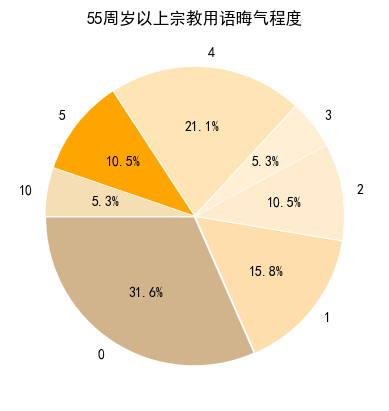

In [41]:
#55周岁以上
labels = ['0','1','2','3','4','5','10']
count=19
share4 =[6/count,3/count,2/count,1/count,4/count,2/count,1/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
plt.pie(share4, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])

# 标题
plt.title('55周岁以上宗教用语晦气程度')
plt.savefig("./55周岁以上宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.2.2  宗教用语分城市/农村晦气程度

In [42]:
#宗教用语分城市/农村晦气程度
#城市
data5['宗教用语晦气程度'].value_counts()

0       84
2       27
1       23
(跳过)    22
4       11
5        9
3        5
6        4
8        3
9        2
7        1
10       1
Name: 宗教用语晦气程度, dtype: int64

In [43]:
#农村
data6['宗教用语晦气程度'].value_counts()

0       14
(跳过)     5
2        4
1        4
4        4
5        2
3        2
6        1
7        1
8        1
9        1
Name: 宗教用语晦气程度, dtype: int64

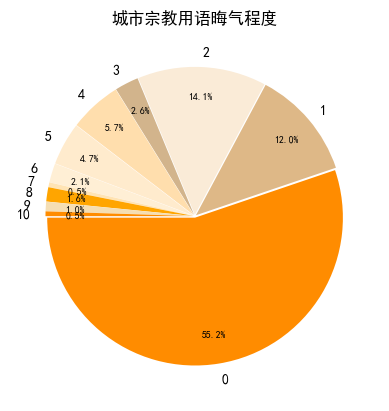

In [44]:
#城市与农村宗教用语晦气程度饼图
labels = ['0','1','2','3','4','5','6','7','8','9','10']
count1=192
count2=39
share5 =[106/count1,23/count1,27/count1,5/count1,11/count1,9/count1,4/count1,1/count1,3/count1,2/count1,1/count1]
share6 =[19/count2,4/count2,4/count2,2/count2,4/count2,2/count2,1/count2,1/count2,1/count2,1/count2,0/count2]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01] 

# 分裂饼图
patches,l_text,p_text = plt.pie(share5, explode = explode,
        labels = labels, autopct = '%3.1f%%',pctdistance = 0.8,
        startangle = 180, shadow = False,
        colors = ['darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])
for t in p_text:
    t.set_size(7)
plt.title('城市宗教用语晦气程度')
plt.savefig("./城市宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

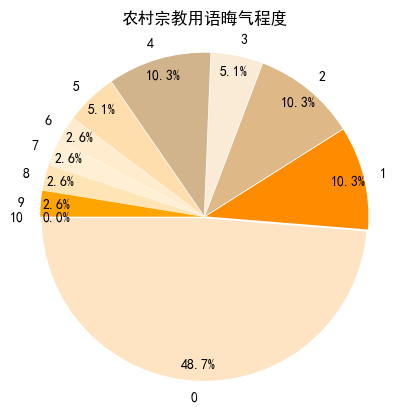

In [45]:
plt.title('农村宗教用语晦气程度')
plt.pie(share6, explode = explode,
        labels = labels, autopct = '%3.1f%%', radius = 1.1,
        startangle = 180, shadow = False, pctdistance = 0.9,
        colors = ['bisque', 'darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])

plt.savefig("./农村宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.2.3  宗教用语分民族晦气程度

In [46]:
#宗教用语分民族晦气程度
#汉族
data7['宗教用语晦气程度'].value_counts()

0       84
2       25
1       23
(跳过)    18
4       11
5        7
3        7
6        5
8        3
9        2
7        2
Name: 宗教用语晦气程度, dtype: int64

In [47]:
#少数民族
data8['宗教用语晦气程度'].value_counts()

0       14
(跳过)     9
2        6
4        4
5        4
1        4
8        1
9        1
10       1
Name: 宗教用语晦气程度, dtype: int64

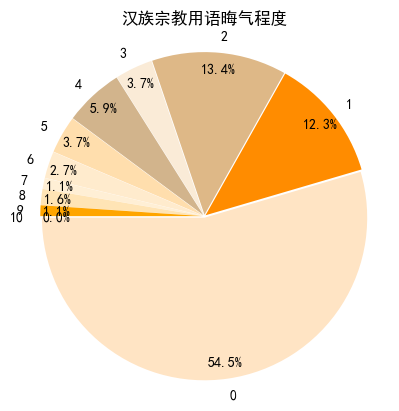

In [48]:
#民族宗教用语晦气程度饼图
labels = ['0','1','2','3','4','5','6','7','8','9','10']
count1=187
count2=44
share7 =[102/count1,23/count1,25/count1,7/count1,11/count1,7/count1,5/count1,2/count1,3/count1,2/count1,0/count1]
share8 =[23/count2,4/count2,6/count2,0/count2,4/count2,4/count2,0/count2,0/count2,1/count2,1/count2,1/count2]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01] 

# 分裂饼图
plt.pie(share7, explode = explode,
        labels = labels, autopct = '%3.1f%%', radius = 1.1,
        startangle = 180, shadow = False, pctdistance = 0.9,
        colors = ['bisque', 'darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])
plt.title('汉族宗教用语晦气程度')
plt.savefig("./汉族宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

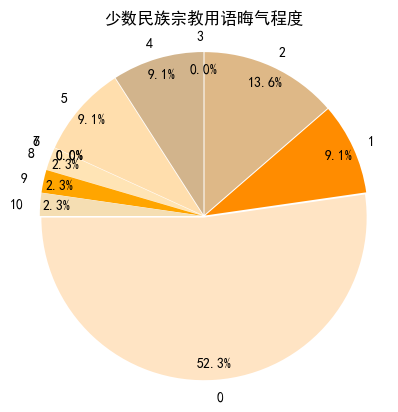

In [49]:
plt.title('少数民族宗教用语晦气程度')
plt.pie(share8, explode = explode,
        labels = labels, autopct = '%3.1f%%', radius = 1.1,
        startangle = 180, shadow = False, pctdistance = 0.9,
        colors = ['bisque', 'darkorange', 'burlywood', 'antiquewhite','tan','navajowhite','blanchedalmond','papayawhip','moccasin','orange','wheat'])

plt.savefig("./少数民族宗教用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

## 2、常规表述调查

In [50]:
#拆分常规表述的认知情况
def get_counts(inputs):
    '''
    对于“xx|yy|zz”形式进行计数
    '''
    y = [x for x in inputs.str.split('┋')]
    counts = {}

    for item in y:
        for select in item:
            if not counts.get(select):
                counts[select] = 1
            else:
                counts[select] += 1
    return counts
count = get_counts(data['常规表述认知'])
print(count.keys(),'\n',count.values())

dict_keys(['死', '去世', '没了', '走了', '作古', '长眠', '归西', '离开人世']) 
 dict_values([192, 218, 197, 212, 106, 148, 157, 184])


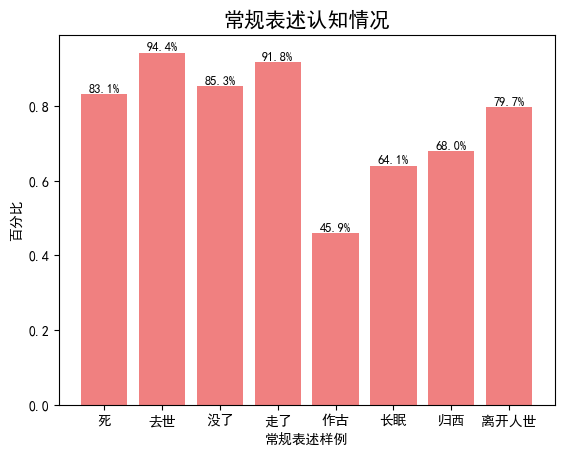

In [51]:
#绘制常规表述认知柱形图
x=np.arange(8)
labels = tuple(count.keys())
share = list(map(div(231),count.values()))
plt.bar(x,share,color='lightcoral', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('常规表述样例')
plt.title('常规表述认知情况',fontsize=15)
plt.savefig("./changgui_rec.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 2.1  常规表述使用频率

In [52]:
#常规表述使用频率


#### 2.1.1 常规表述分年龄段使用频率

In [53]:
#常规表述分年龄段使用频率


#### 2.1.2  常规表述分城市/农村使用频率

In [54]:
#常规表述分城市/农村使用频率


#### 2.1.3  常规表述分民族使用频率

In [55]:
#常规表述分民族使用频率


### 2.2  常规表述晦气程度

In [56]:
#常规表述晦气程度


#### 2.2.1  常规表述分年龄段晦气程度

In [57]:
#常规表述分年龄段晦气程度


#### 2.2.2  常规表述分城市/农村晦气程度

In [58]:
#常规表述分城市/农村晦气程度


#### 2.2.3  常规表述分民族晦气程度

In [59]:
#常规表述分民族晦气程度


## 3、网络用语调查

In [60]:
#拆分网络用语的认知情况
y = [x for x in data['网络用语认知'].str.split('┋')]
ji = 0
ga = 0
wu = 0
si1 = 0
si2 = 0
nop = 0
for item in y:
    for select in item:
        if select=='寄':
            ji = ji+1
        elif select=='噶':
            ga = ga + 1
        elif select=='无':
            wu = wu + 1
        elif select == '4':
            si1 = si1 +1
        elif select == '亖':
            si2 = si2 +1
        else:
            nop = nop + 1
        
print('寄：',ji)
print('噶：',ga) 
print('无：',wu) 
print('4：',si1) 
print('亖：',si2)
print('都没听说过：',nop)

寄： 132
噶： 147
无： 118
4： 120
亖： 112
都没听说过： 56


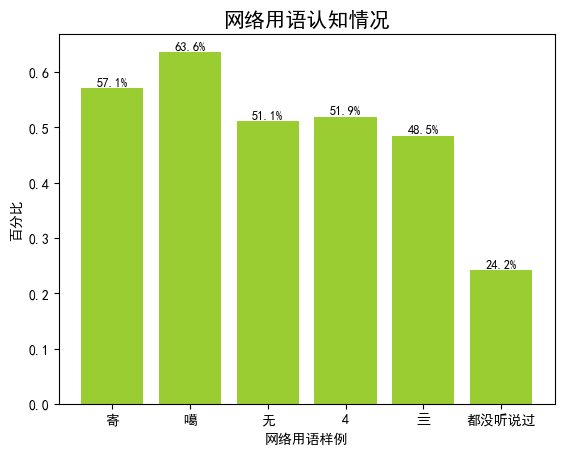

In [61]:
#绘制网络用语认知柱形图
x=np.arange(6)
labels = ('寄','噶','无','4','亖','都没听说过')
share = [132/231, 147/231, 118/231,120/231,112/231,56/231]
plt.bar(x,share,color='yellowgreen', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('网络用语样例')
plt.title('网络用语认知情况',fontsize=15)
plt.savefig("./网络用语认知情况.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 3.1 网络用语使用频率

In [62]:
#网络用语使用频率
ans_net_f = get_num(data,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_f.keys(),ans_net_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([968, 717, 640, 502, 547])


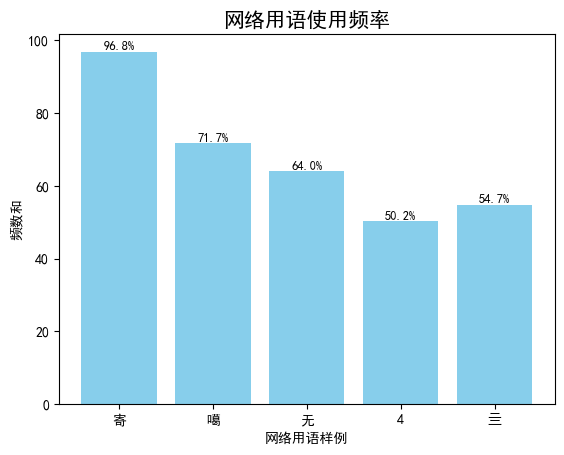

In [63]:
#网络用语使用频率柱形图
x=np.arange(5)
labels = tuple(ans_net_f.keys())
share = list(map(div(10),[968, 717, 640, 502, 547]))
plt.bar(x,share,color='skyblue', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('频数和')
plt.xlabel('网络用语样例')
plt.title('网络用语使用频率',fontsize=15)
plt.savefig("./网络用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 3.1.1  网络用语分年龄段使用频率

In [64]:
#网络用语分年龄段使用频率
ans_net_age1_f = get_num(data1,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_age1_f.keys(),ans_net_age1_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([41, 60, 47, 44, 34])


In [65]:
ans_net_age2_f = get_num(data2,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_age2_f.keys(),ans_net_age2_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([834, 513, 482, 324, 411])


In [66]:
ans_net_age3_f = get_num(data3,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_age3_f.keys(),ans_net_age3_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([76, 132, 105, 125, 93])


In [67]:
ans_net_age4_f = get_num(data4,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_age4_f.keys(),ans_net_age4_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([17, 12, 6, 9, 9])


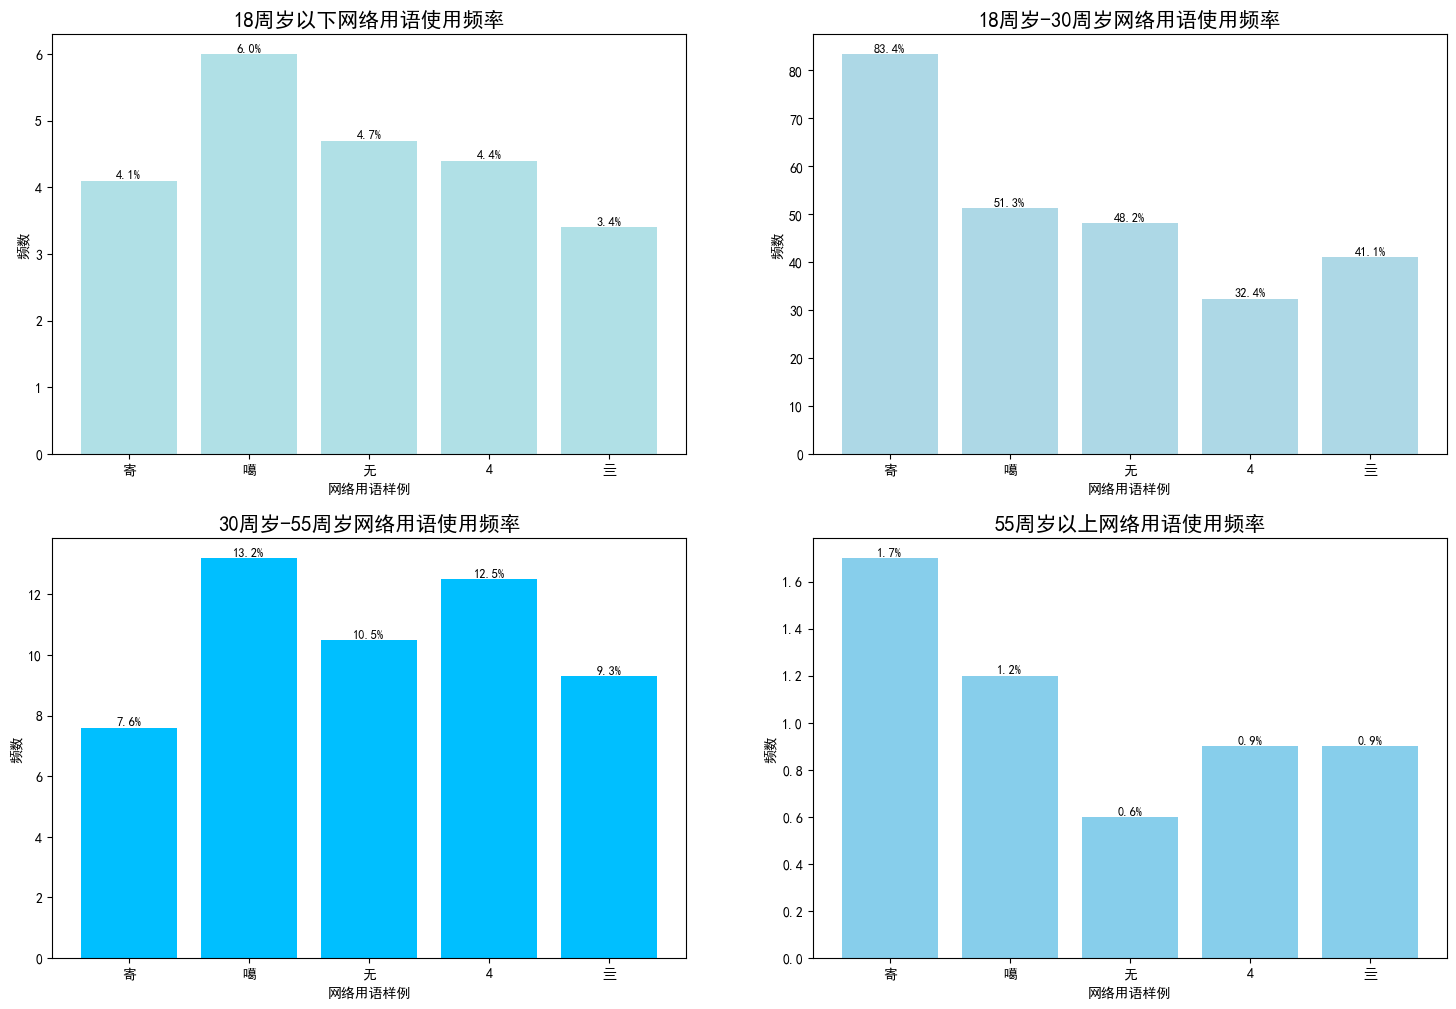

In [68]:
#网络用语使用频率各年龄段柱形图
figure,axes = plt.subplots(2,2,figsize=(18,12),dpi=100)
ax = axes.flatten()

#18周岁以下
x1=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share1 = list(map(div(10),[41, 60, 47, 44, 34]))
axes[0][0].bar(x1,share1,color='powderblue', tick_label=labels) 
for a,b in zip(x1,share1):
    axes[0][0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0][0].set_ylabel('频数')
axes[0][0].set_xlabel('网络用语样例')
axes[0][0].set_title('18周岁以下网络用语使用频率',fontsize=15)

#18周岁-30周岁
x2=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share2 = list(map(div(10),[834, 513, 482, 324, 411]))
axes[0][1].bar(x2,share2,color='lightblue', tick_label=labels) 
for a,b in zip(x2,share2):
    axes[0][1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0][1].set_ylabel('频数')
axes[0][1].set_xlabel('网络用语样例')
axes[0][1].set_title('18周岁-30周岁网络用语使用频率',fontsize=15)

#30周岁-55周岁
x3=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share3 = list(map(div(10),[76, 132, 105, 125, 93]))
axes[1][0].bar(x3,share3,color='deepskyblue', tick_label=labels) 
for a,b in zip(x3,share3):
    axes[1][0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1][0].set_ylabel('频数')
axes[1][0].set_xlabel('网络用语样例')
axes[1][0].set_title('30周岁-55周岁网络用语使用频率',fontsize=15)

#55周岁以上
x4=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share4 = list(map(div(10),[17, 12, 6, 9, 9]))
axes[1][1].bar(x4,share4,color='skyblue', tick_label=labels) 
for a,b in zip(x4,share4):
    axes[1][1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1][1].set_ylabel('频数')
axes[1][1].set_xlabel('网络用语样例')
axes[1][1].set_title('55周岁以上网络用语使用频率',fontsize=15)

plt.savefig("./各年龄段网络用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

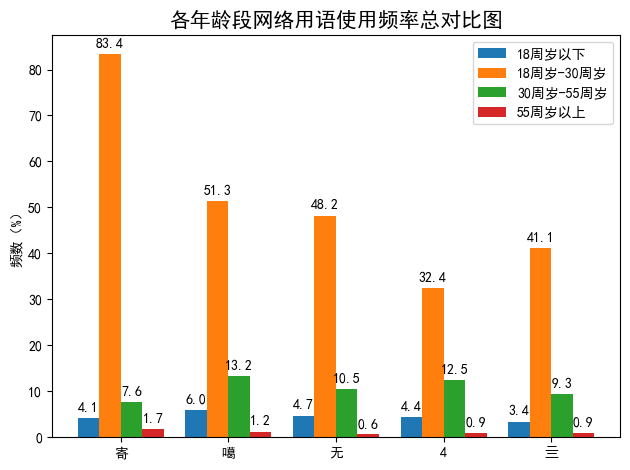

In [69]:
x=np.arange(5)
labels = tuple(ans_net_age1_f.keys())

width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, share1, width, label='18周岁以下')
rects2 = ax.bar(x - width*0.5, share2, width, label='18周岁-30周岁')
rects3 = ax.bar(x + width*0.5, share3, width, label='30周岁-55周岁')
rects4 = ax.bar(x + width*1.5, share4, width, label='55周岁以上')

ax.set_ylabel('频数（%）')
ax.set_title('各年龄段网络用语使用频率总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
    
plt.savefig("./各年龄段网络用语使用频率总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 3.1.2  网络用语分城市/农村使用频率

In [70]:
#城市
ans_net_city_f = get_num(data5,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_city_f.keys(),ans_net_city_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([831, 625, 522, 414, 477])


In [71]:
#农村
ans_net_country_f = get_num(data6,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_country_f.keys(),ans_net_country_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([137, 92, 118, 88, 70])


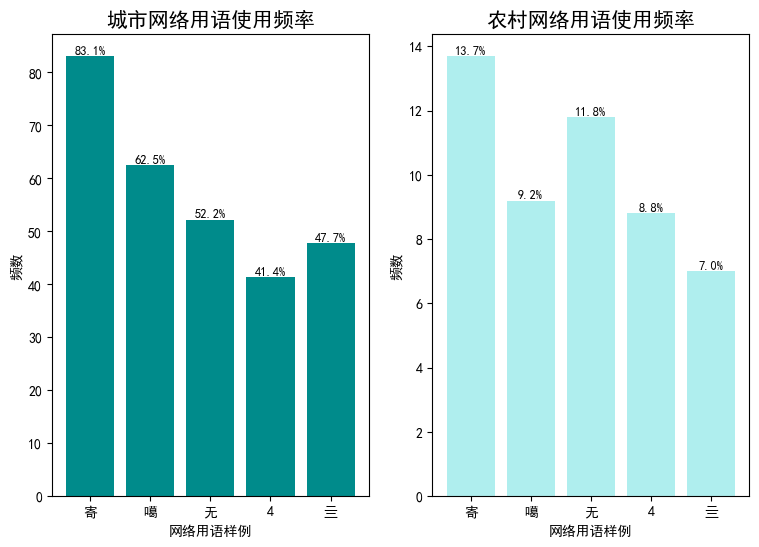

In [72]:
#网络用语分城市/农村使用频率
figure,axes = plt.subplots(1,2,figsize=(9,6),dpi=100)
ax = axes.flatten()

#城市
x1=np.arange(5)
labels = tuple(ans_net_city_f.keys())
share5 = list(map(div(10),[831, 625, 522, 414, 477]))
axes[0].bar(x1,share5,color='darkcyan', tick_label=labels) 
for a,b in zip(x1,share5):
    axes[0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0].set_ylabel('频数')
axes[0].set_xlabel('网络用语样例')
axes[0].set_title('城市网络用语使用频率',fontsize=15)

#农村
x2=np.arange(5)
labels = tuple(ans_net_country_f.keys())
share6 = list(map(div(10),[137, 92, 118, 88, 70]))
axes[1].bar(x2,share6,color='paleturquoise', tick_label=labels) 
for a,b in zip(x2,share6):
    axes[1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1].set_ylabel('频数')
axes[1].set_xlabel('网络用语样例')
axes[1].set_title('农村网络用语使用频率',fontsize=15)

plt.savefig("./城市与农村网络用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

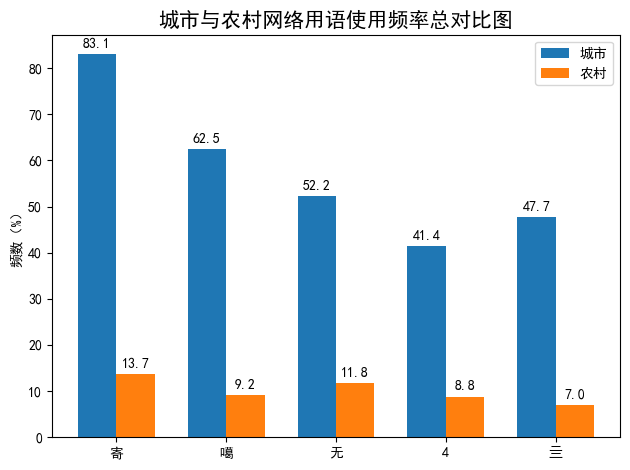

In [73]:
#城市与农村网络用语使用频率对比图
x=np.arange(5)
labels = tuple(ans_net_city_f.keys())

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects5 = ax.bar(x - width*0.5, share5, width, label='城市')
rects6 = ax.bar(x + width*0.5, share6, width, label='农村')

ax.set_ylabel('频数（%）')
ax.set_title('城市与农村网络用语使用频率总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects5)
autolabel(rects6)
fig.tight_layout()
    
plt.savefig("./城市与农村网络用语使用频率总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 3.1.3  网络用语分民族使用频率

In [74]:
#网络用语分民族使用频率
#汉族
ans_net_han_f = get_num(data7,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_han_f.keys(),ans_net_han_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([822, 624, 545, 396, 447])


In [75]:
#少数民族
ans_net_qt_f = get_num(data8,['网络用语频率—寄', '网络用语频率-噶', '网络用语频率-无', '网络用语频率-4', '网络用语频率-亖'],['寄','噶','无','4','亖'])
print(ans_net_qt_f.keys(),ans_net_qt_f.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([146, 93, 95, 106, 100])


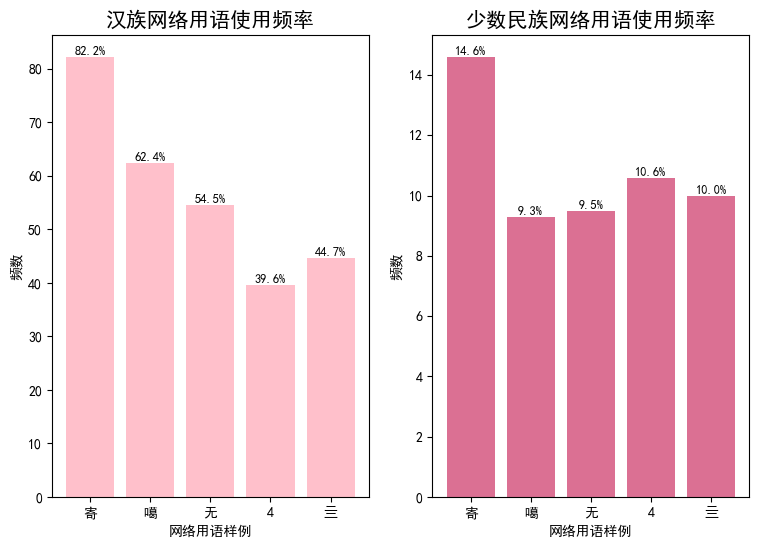

In [76]:
#网络用语分民族使用频率
figure,axes = plt.subplots(1,2,figsize=(9,6),dpi=100)
ax = axes.flatten()

#汉族
x1=np.arange(5)
labels = tuple(ans_net_han_f.keys())
share7 = list(map(div(10),[822, 624, 545, 396, 447]))
axes[0].bar(x1,share7,color='pink', tick_label=labels) 
for a,b in zip(x1,share7):
    axes[0].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[0].set_ylabel('频数')
axes[0].set_xlabel('网络用语样例')
axes[0].set_title('汉族网络用语使用频率',fontsize=15)

#少数民族
x2=np.arange(5)
labels = tuple(ans_net_qt_f.keys())
share8 = list(map(div(10),[146, 93, 95, 106, 100]))
axes[1].bar(x2,share8,color='palevioletred', tick_label=labels) 
for a,b in zip(x2,share8):
    axes[1].text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
axes[1].set_ylabel('频数')
axes[1].set_xlabel('网络用语样例')
axes[1].set_title('少数民族网络用语使用频率',fontsize=15)

plt.savefig("./汉族与少数民族网络用语使用频率.png",dpi=500,bbox_inches = 'tight')
plt.show()

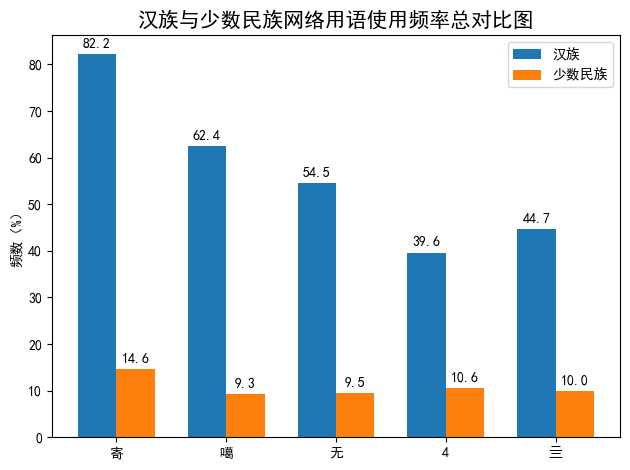

In [77]:
#各民族网络用语使用频率对比图
x=np.arange(5)
labels = tuple(ans_net_han_f.keys())

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects7 = ax.bar(x - width*0.5, share7, width, label='汉族')
rects8 = ax.bar(x + width*0.5, share8, width, label='少数民族')

ax.set_ylabel('频数（%）')
ax.set_title('汉族与少数民族网络用语使用频率总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects7)
autolabel(rects8)
fig.tight_layout()
    
plt.savefig("./汉族与少数民族网络用语使用频率总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 3.2  网络用语晦气程度

In [78]:
#网络用语晦气程度
ans_net_hq = get_num(data,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_hq.keys(),ans_net_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([280, 391, 251, 410, 399])


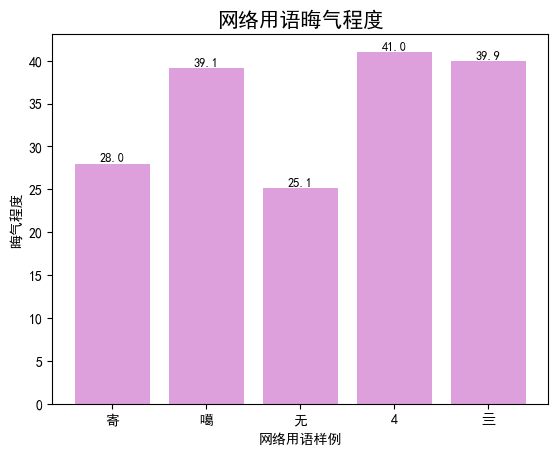

In [79]:
#网络用语晦气程度柱形图
x=np.arange(5)
labels = tuple(ans_net_hq.keys())
share = list(map(div(10),[280, 391, 251, 410, 399]))
plt.bar(x,share,color='plum', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,b,ha='center', va= 'bottom',fontsize=9)
plt.ylabel('晦气程度')
plt.xlabel('网络用语样例')
plt.title('网络用语晦气程度',fontsize=15)
plt.savefig("./网络用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 3.2.1  网络用语分年龄段晦气程度

In [80]:
#网络用语晦气程度分年龄段
ans_net_age1_hq = get_num(data1,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_age1_hq.keys(),ans_net_age1_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([14, 17, 7, 25, 24])


In [81]:
ans_net_age2_hq = get_num(data2,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_age2_hq.keys(),ans_net_age2_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([166, 236, 127, 250, 251])


In [82]:
ans_net_age3_hq = get_num(data3,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_age3_hq.keys(),ans_net_age3_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([94, 124, 109, 121, 106])


In [83]:
ans_net_age4_hq = get_num(data4,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_age4_hq.keys(),ans_net_age4_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([6, 14, 8, 14, 18])


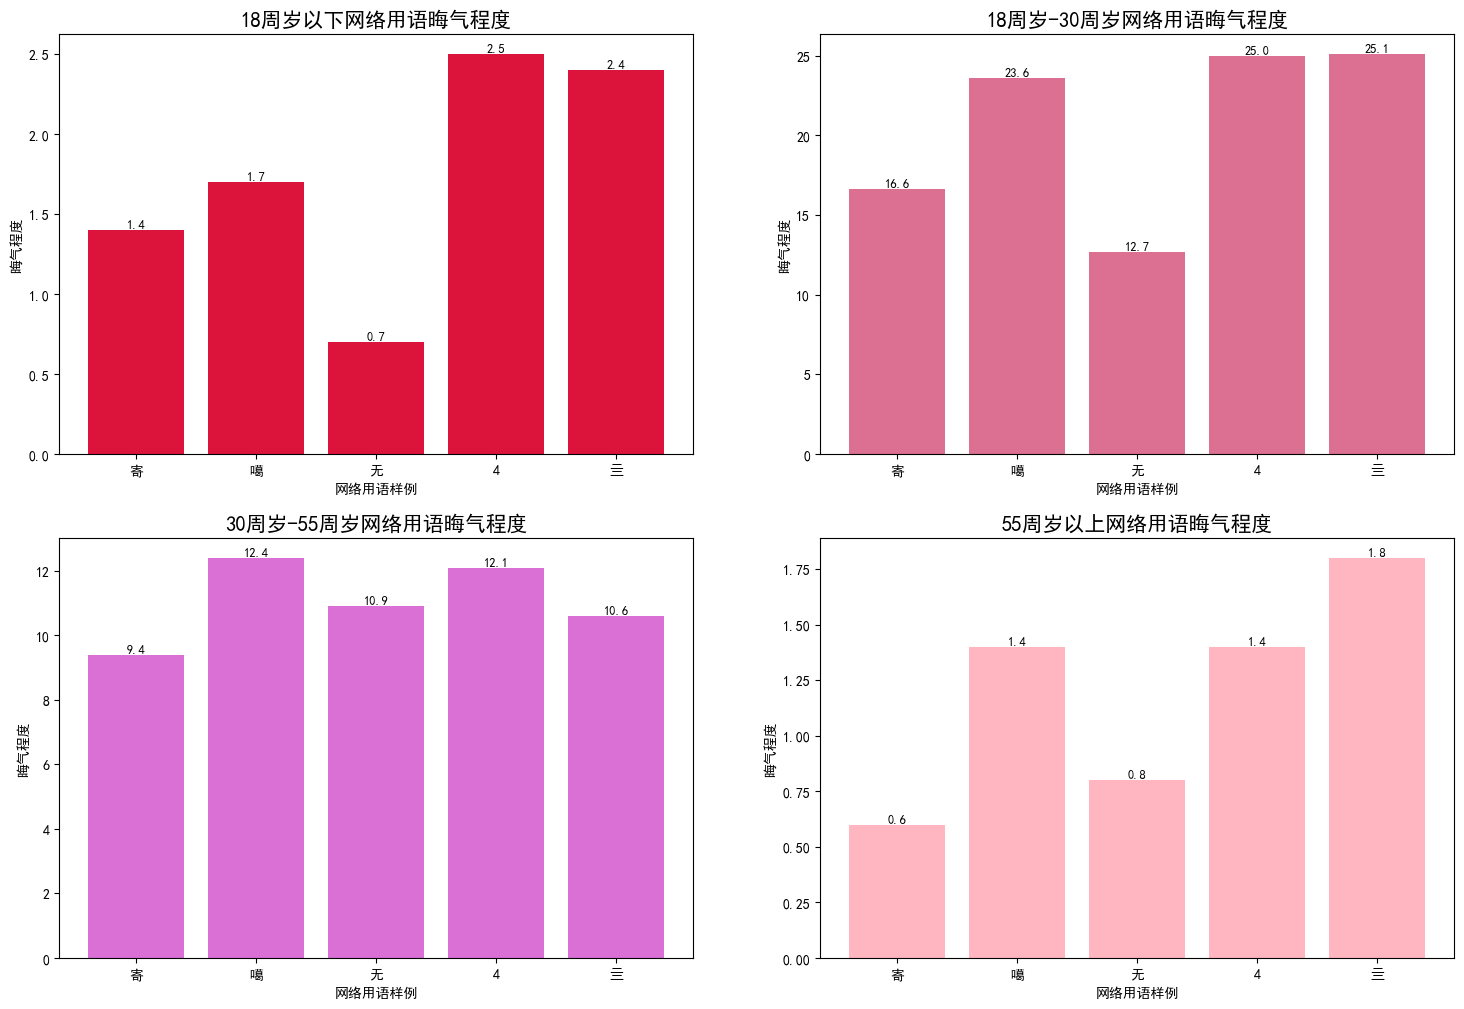

In [84]:
#网络用语晦气程度各年龄段柱形图
figure,axes = plt.subplots(2,2,figsize=(18,12),dpi=100)
ax = axes.flatten()

#18周岁以下
x1=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share1 = list(map(div(10),[14, 17, 7, 25, 24]))
axes[0][0].bar(x1,share1,color='crimson', tick_label=labels) 
for a,b in zip(x1,share1):
    axes[0][0].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[0][0].set_ylabel('晦气程度')
axes[0][0].set_xlabel('网络用语样例')
axes[0][0].set_title('18周岁以下网络用语晦气程度',fontsize=15)

#18周岁-30周岁
x2=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share2 = list(map(div(10),[166, 236, 127, 250, 251]))
axes[0][1].bar(x2,share2,color='palevioletred', tick_label=labels) 
for a,b in zip(x2,share2):
    axes[0][1].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[0][1].set_ylabel('晦气程度')
axes[0][1].set_xlabel('网络用语样例')
axes[0][1].set_title('18周岁-30周岁网络用语晦气程度',fontsize=15)

#30周岁-55周岁
x3=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share3 = list(map(div(10),[94, 124, 109, 121, 106]))
axes[1][0].bar(x3,share3,color='orchid', tick_label=labels) 
for a,b in zip(x3,share3):
    axes[1][0].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[1][0].set_ylabel('晦气程度')
axes[1][0].set_xlabel('网络用语样例')
axes[1][0].set_title('30周岁-55周岁网络用语晦气程度',fontsize=15)

#55周岁以上
x4=np.arange(5)
labels = tuple(ans_net_age1_f.keys())
share4 = list(map(div(10),[6, 14, 8, 14, 18]))
axes[1][1].bar(x4,share4,color='lightpink', tick_label=labels) 
for a,b in zip(x4,share4):
    axes[1][1].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[1][1].set_ylabel('晦气程度')
axes[1][1].set_xlabel('网络用语样例')
axes[1][1].set_title('55周岁以上网络用语晦气程度',fontsize=15)

plt.savefig("./各年龄段网络用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

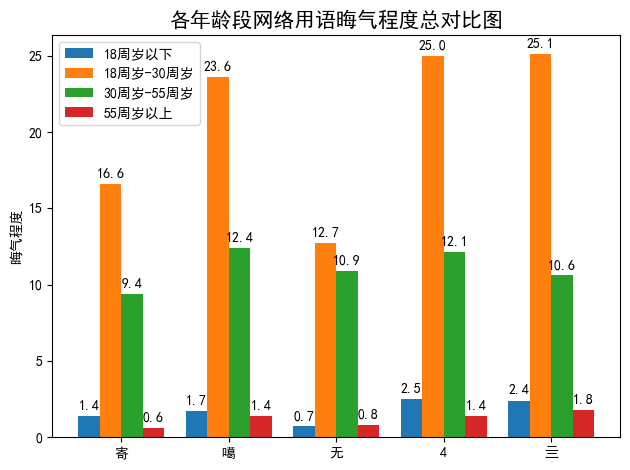

In [85]:
#各年龄段网络用语晦气程度总图
x=np.arange(5)
labels = tuple(ans_net_age1_hq.keys())

width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, share1, width, label='18周岁以下')
rects2 = ax.bar(x - width*0.5, share2, width, label='18周岁-30周岁')
rects3 = ax.bar(x + width*0.5, share3, width, label='30周岁-55周岁')
rects4 = ax.bar(x + width*1.5, share4, width, label='55周岁以上')

ax.set_ylabel('晦气程度')
ax.set_title('各年龄段网络用语晦气程度总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
    
plt.savefig("./各年龄段网络用语晦气程度总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 3.2.2  网络用语分城市/农村晦气程度

In [86]:
#网络用语分城市/农村晦气程度
#城市
ans_net_city_hq = get_num(data5,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_city_hq.keys(),ans_net_city_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([224, 305, 188, 313, 325])


In [87]:
#农村
ans_net_country_hq = get_num(data6,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_country_hq.keys(),ans_net_country_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([56, 86, 63, 97, 74])


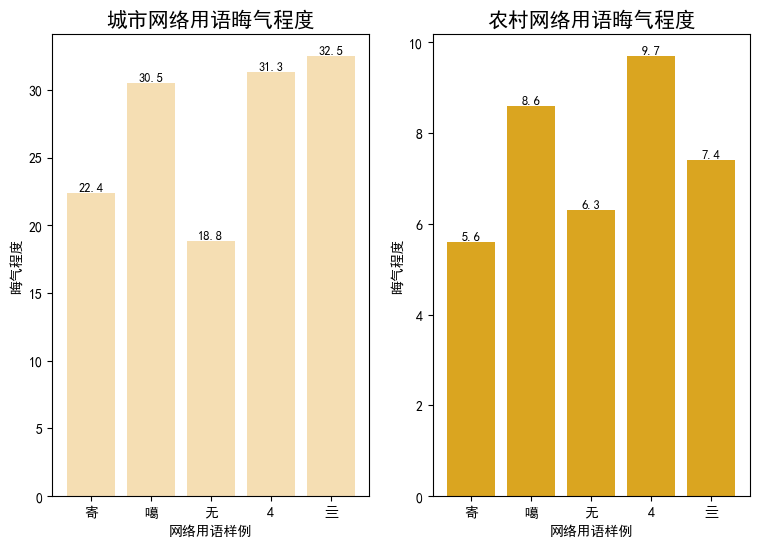

In [88]:
#网络用语分城市/农村晦气程度
figure,axes = plt.subplots(1,2,figsize=(9,6),dpi=100)
ax = axes.flatten()

#城市
x1=np.arange(5)
labels = tuple(ans_net_city_hq.keys())
share5 = list(map(div(10),[224, 305, 188, 313, 325]))
axes[0].bar(x1,share5,color='wheat', tick_label=labels) 
for a,b in zip(x1,share5):
    axes[0].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[0].set_ylabel('晦气程度')
axes[0].set_xlabel('网络用语样例')
axes[0].set_title('城市网络用语晦气程度',fontsize=15)

#农村
x2=np.arange(5)
labels = tuple(ans_net_country_hq.keys())
share6 = list(map(div(10),[56, 86, 63, 97, 74]))
axes[1].bar(x2,share6,color='goldenrod', tick_label=labels) 
for a,b in zip(x2,share6):
    axes[1].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[1].set_ylabel('晦气程度')
axes[1].set_xlabel('网络用语样例')
axes[1].set_title('农村网络用语晦气程度',fontsize=15)

plt.savefig("./城市与农村网络用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

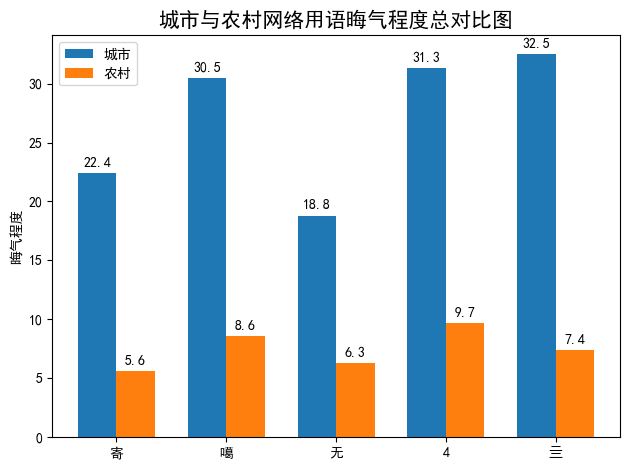

In [89]:
#城市与农村网络用语晦气程度对比图
x=np.arange(5)
labels = tuple(ans_net_city_hq.keys())

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects5 = ax.bar(x - width*0.5, share5, width, label='城市')
rects6 = ax.bar(x + width*0.5, share6, width, label='农村')

ax.set_ylabel('晦气程度')
ax.set_title('城市与农村网络用语晦气程度总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects5)
autolabel(rects6)
fig.tight_layout()
    
plt.savefig("./城市与农村网络用语晦气程度总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 3.2.3  网络用语分民族晦气程度

In [90]:
#网络用语分民族晦气程度
#汉族
ans_net_han_hq = get_num(data7,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_han_hq.keys(),ans_net_han_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([218, 325, 184, 331, 341])


In [91]:
#少数民族
ans_net_qt_hq = get_num(data8,['网络用语晦气程度—寄', '网络用语晦气程度—噶', '网络用语晦气程度—无', '网络用语晦气程度—4', '网络用语晦气程度—亖'],['寄','噶','无','4','亖'])
print(ans_net_qt_hq.keys(),ans_net_qt_hq.values())

dict_keys(['寄', '噶', '无', '4', '亖']) dict_values([62, 66, 67, 79, 58])


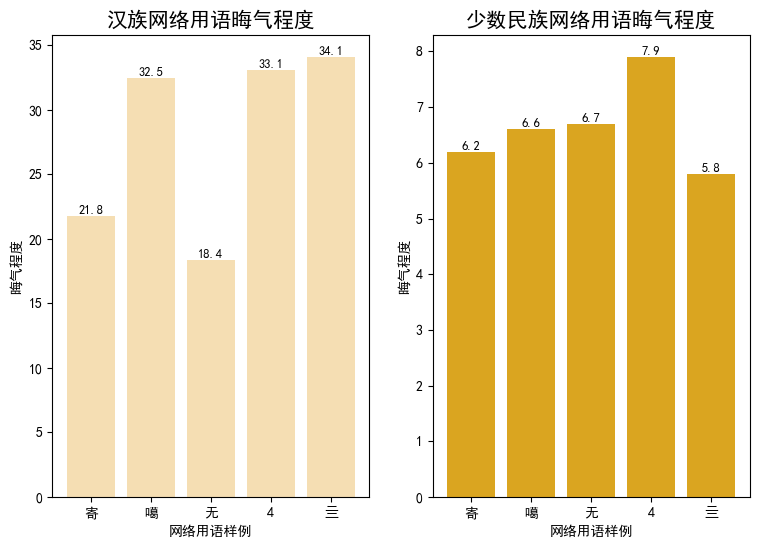

In [92]:
#网络用语分民族晦气程度
figure,axes = plt.subplots(1,2,figsize=(9,6),dpi=100)
ax = axes.flatten()

#汉族
x1=np.arange(5)
labels = tuple(ans_net_city_hq.keys())
share7 = list(map(div(10),[218, 325, 184, 331, 341]))
axes[0].bar(x1,share7,color='wheat', tick_label=labels) 
for a,b in zip(x1,share7):
    axes[0].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[0].set_ylabel('晦气程度')
axes[0].set_xlabel('网络用语样例')
axes[0].set_title('汉族网络用语晦气程度',fontsize=15)

#少数民族
x2=np.arange(5)
labels = tuple(ans_net_country_hq.keys())
share8 = list(map(div(10),[62, 66, 67, 79, 58]))
axes[1].bar(x2,share8,color='goldenrod', tick_label=labels) 
for a,b in zip(x2,share8):
    axes[1].text(a,b,b,ha='center', va= 'bottom',fontsize=9)
axes[1].set_ylabel('晦气程度')
axes[1].set_xlabel('网络用语样例')
axes[1].set_title('少数民族网络用语晦气程度',fontsize=15)

plt.savefig("./汉族与少数民族网络用语晦气程度.png",dpi=500,bbox_inches = 'tight')
plt.show()

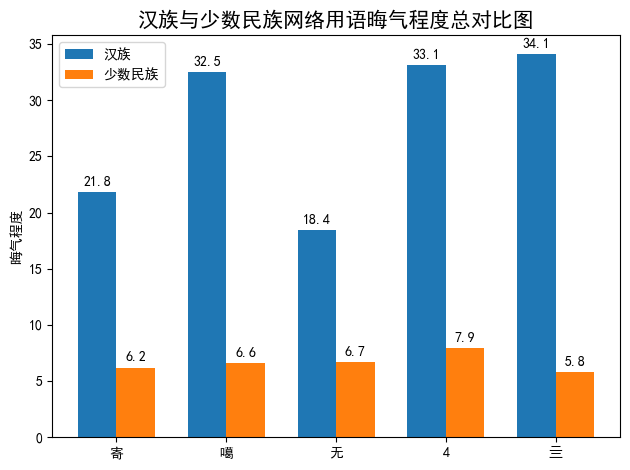

In [93]:
#各民族网络用语晦气程度对比图
x=np.arange(5)
labels = tuple(ans_net_han_hq.keys())

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects7 = ax.bar(x - width*0.5, share7, width, label='汉族')
rects8 = ax.bar(x + width*0.5, share8, width, label='少数民族')

ax.set_ylabel('晦气程度')
ax.set_title('汉族与少数民族网络用语晦气程度总对比图',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects7)
autolabel(rects8)
fig.tight_layout()
    
plt.savefig("./汉族与少数民族网络用语晦气程度总对比图.png",dpi=500,bbox_inches = 'tight')
plt.show()

# 三、对丧葬方式的调查

## 1、丧葬方式认知情况 

In [94]:
#拆分丧葬方式的认知情况
y = [x for x in data['丧葬方式认知'].str.split('┋')]
tu = 0
huo = 0
shui = 0
tian = 0
other = 0
nop = 0
for item in y:
    for select in item:
        if select[0]=='土':
            tu = tu+1
        elif select[0]=='火':
            huo = huo + 1
        elif select[0]=='水':
            shui = shui + 1
        elif select[0] == '天':
            tian = tian +1
        elif select[0] == '其':
            other = other +1
        else:
            nop = nop + 1
        
print('土：',tu)
print('火：',huo) 
print('水：',shui) 
print('天：',tian) 
print('其：',other)
print('都没听过：',nop)

土： 222
火： 211
水： 132
天： 119
其： 4
都没听过： 0


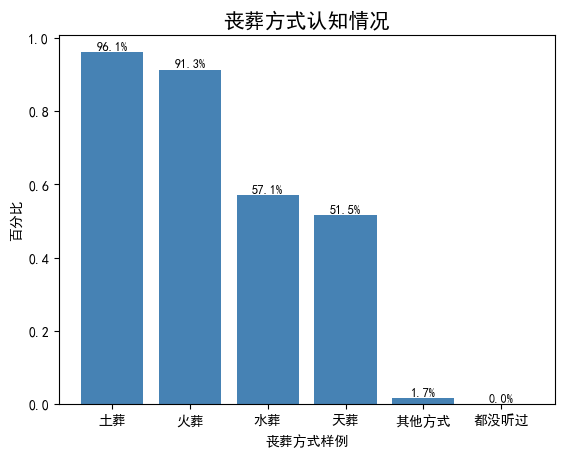

In [95]:
#绘制丧葬方式认知柱形图
x=np.arange(6)
labels = ('土葬','火葬','水葬','天葬','其他方式','都没听过')
share = [222/231, 211/231, 132/231,119/231,4/231,0/231]
plt.bar(x,share,color='steelblue', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('丧葬方式样例')
plt.title('丧葬方式认知情况',fontsize=15)
plt.savefig("./丧葬方式认知情况.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 1.1 丧葬方式认知情况分年龄段

In [96]:
#18周岁以下
y = [x for x in data1['丧葬方式认知'].str.split('┋')]
tu = 0
huo = 0
shui = 0
tian = 0
other = 0
nop = 0
for item in y:
    for select in item:
        if select[0]=='土':
            tu = tu+1
        elif select[0]=='火':
            huo = huo + 1
        elif select[0]=='水':
            shui = shui + 1
        elif select[0] == '天':
            tian = tian +1
        elif select[0] == '其':
            other = other +1
        else:
            nop = nop + 1
        
print('土：',tu)
print('火：',huo) 
print('水：',shui) 
print('天：',tian) 
print('其：',other)
print('都没听过：',nop)

土： 11
火： 11
水： 6
天： 4
其： 0
都没听过： 0


In [97]:
#丧葬方式分年龄段柱形图

### 1.2 丧葬方式认知情况分城市/农村

In [98]:
#丧葬方式认知情况分城市/农村


### 1.3  丧葬方式认知情况分民族

In [99]:
#丧葬方式认知情况分民族


## 2、丧葬方式意愿统计 

In [100]:
#丧葬方式意愿统计 


###  2.1 丧葬方式意愿分年龄段

In [101]:
#丧葬方式意愿分年龄段


### 2.2  丧葬方式意愿分城市/农村

In [102]:
#丧葬方式意愿分城市/农村


### 2.3  丧葬方式意愿分民族

In [103]:
#丧葬方式意愿分民族


## 3、丧葬仪式意愿程度统计 

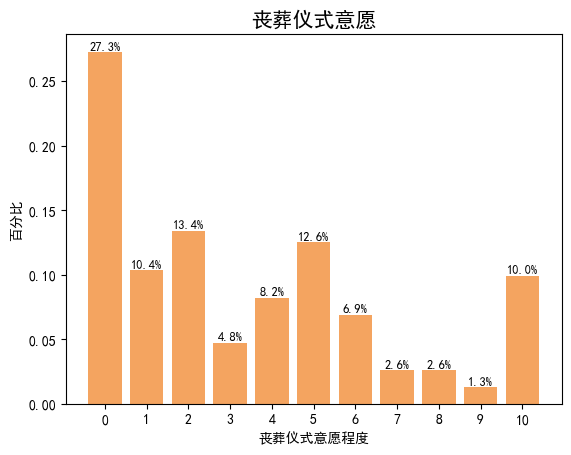

In [104]:
#丧葬仪式意愿程度
#统计各意愿值
data['丧葬仪式意愿程度'].value_counts()

#绘制丧葬仪式意愿程度柱形图
x=np.arange(11)
labels = ('0','1','2','3','4','5','6','7','8','9','10')
share = [63/231, 24/231, 31/231,11/231,19/231,29/231,16/231,6/231,6/231,3/231,23/231]
plt.bar(x,share,color='sandybrown', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('丧葬仪式意愿程度')
plt.title('丧葬仪式意愿',fontsize=15)
plt.savefig("./丧葬仪式意愿.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 3.1  丧葬仪式意愿程度分年龄段

In [105]:
#丧葬仪式意愿程度分年龄段


### 3.2  丧葬仪式意愿程度分城市/农村

In [106]:
#丧葬仪式意愿程度分城市/农村


### 3.3  丧葬仪式意愿程度分民族

In [107]:
#丧葬仪式意愿程度分民族
